<a href="https://colab.research.google.com/github/warriorwizard/c4.5-iris-dataset/blob/main/Iris_dataset_NPS_Amit(NIET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  from google.colab import drive

#  drive.mount('/content/gdrive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

In [ ]:
import pandas as pd
# iris=pd.read_excel('/content/sample_data/Data by NPS_IRIS.xlsx')
iris=pd.read_excel('/content/Data by NPS_IRIS.xlsx')

In [ ]:
iris.head()

,SN,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
#split dataset in features and target variable
feature_cols = ['SN', 'sepal_length', 'sepal_width', 'petal_length','petal_width']
X = iris[feature_cols] # Features
y = iris.species # Target variable
iris = iris.replace(['setosa', 'versicolor','virginica'], [0, 1, 2])
                    


In [ ]:
iris.head()

,SN,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
iris.describe()

,SN,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Helper functions to calculate the performance of our models.
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import neighbors


In [ ]:
# Helper functions to calculate the performance of our models.
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(str(title.split('\n')[0])+'.png')
    plt.show()
    
def overall_error_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fn = cnf_matrix[1,0]
    fp = cnf_matrix[0,1]
    tn = cnf_matrix[0,0]
    tp = cnf_matrix[1,1]
    n = len(y_test)
    return (fn+fp)/n

def sensitivity(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    tap = pd.DataFrame(y_test).iloc[:,0].value_counts()[1]
    tp = cnf_matrix[1,1]
    return tp/tap

def false_pos_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fp = cnf_matrix[0,1]
    tan = pd.DataFrame(y_test).iloc[:,0].value_counts()[0]
    return fp/tan

def specificity(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    tn = cnf_matrix[0,0]
    tan = pd.DataFrame(y_test).iloc[:,0].value_counts()[0]
    return tn/tan

def false_neg_rate(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    fn = cnf_matrix[1,0]
    tap = pd.DataFrame(y_test).iloc[:,0].value_counts()[1]
    return fn/tap

def prop_true_pos(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tpp = pd.DataFrame(y_pred).iloc[:,0].value_counts()[1]
    except:
        return 0
    tp = cnf_matrix[1,1]
    return tp/tpp

def prop_true_neg(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tn = cnf_matrix[0,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tn/tpn

def recall(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tp = cnf_matrix[1,1]
        fn = cnf_matrix[1,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tp/(fn+tp)

def precision(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        tp = cnf_matrix[1,1]
        fp = cnf_matrix[0,1]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tp/(fp+tp)

def npv(y_pred, y_test):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    try:
        fn = cnf_matrix[1,0]
        fn = cnf_matrix[1,0]
        tn = cnf_matrix[0,0]
        tpn = pd.DataFrame(y_pred).iloc[:,0].value_counts()[0]
    except:
        return 0
    return tn/(tn+fn)

def f1score(y_pred, y_test):
    prec = precision(y_pred, y_test)
    rec = recall(y_pred, y_test)
    f1 = 2 * ((prec * rec)/(prec + rec))
    return f1

def get_descriptive_data(y_pred, y_test):
    print("Accuracy: %f%%" %(round(accuracy_score(y_test, y_pred)*100,2)))
    print("Overall Error Rate: %f%%" %(round(overall_error_rate(y_pred, y_test)*100,2)))
    print('False Positive Rate: %f%%' %(round(false_pos_rate(y_pred, y_test)*100,2)))
    print('False Negative Rate: %f%%' %(round(false_neg_rate(y_pred, y_test)*100,2)))
    print('Specificity: %f%%' %(round(specificity(y_pred, y_test)*100,2)))
    print("Sensitivity: %f%%" %(round(sensitivity(y_pred, y_test)*100,2)))
    print('Proportion True Positive: %f%%' %(round(prop_true_pos(y_pred, y_test)*100,2)))
    print('Proportion True Negative: %f%%' %(round(prop_true_neg(y_pred, y_test)*100,2)))
    print("recall: %f%%" %(round(recall(y_pred, y_test)*100,2)))
    print("precision: %f%%" %(round(precision(y_pred, y_test)*100,2)))
    print("FDR: %f%%" %(100-round(precision(y_pred, y_test)*100,2)))
    print("NPV: %f%%" %(round(precision(y_pred, y_test)*100,2)))
    print("FOR: %f%%" %(100-round(npv(y_pred, y_test)*100,2)))
    print("F1SCORE: %f%%" %(100-round(f1score(y_pred, y_test)*100,2)))

Accuracy: 100.000000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 128.570000%
Proportion True Positive: 128.570000%
Proportion True Negative: 77.780000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


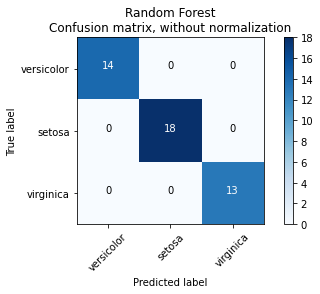

In [ ]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.30, 
                                                    random_state=1)
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
get_descriptive_data(y_pred, y_test)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest\nConfusion matrix, without normalization')



[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy: 97.780000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 121.430000%
Proportion True Positive: 121.430000%
Proportion True Negative: 82.350000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


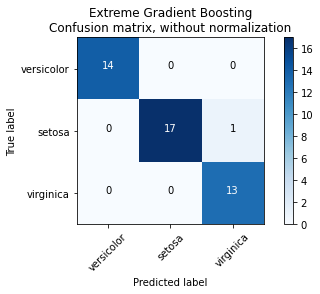

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.30, 
                                                    random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)
np.random.seed(123)
y_pred1 = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred1)
print(cnf_matrix)
get_descriptive_data(y_pred1, y_test)

y_pred1 = pd.Series(y_pred1).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred1.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Extreme Gradient Boosting\nConfusion matrix, without normalization')

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy: 97.780000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 121.430000%
Proportion True Positive: 121.430000%
Proportion True Negative: 82.350000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


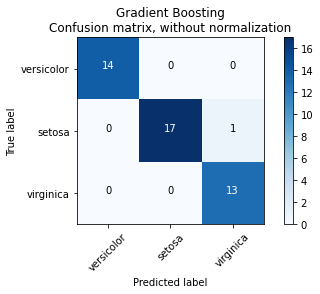

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.30, 
                                                    random_state=1)
gbc.fit(X_train, np.ravel(y_train, order='C'))
np.random.seed(123)
y_pred = gbc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
get_descriptive_data(y_pred, y_test)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Gradient Boosting\nConfusion matrix, without normalization')

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy: 97.780000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 121.430000%
Proportion True Positive: 121.430000%
Proportion True Negative: 82.350000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


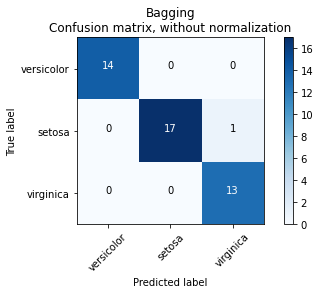

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.30, 
                                                    random_state=1)
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred=bagging_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
get_descriptive_data(y_pred, y_test)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Bagging\nConfusion matrix, without normalization')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
Accuracy: 100.000000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 128.570000%
Proportion True Positive: 128.570000%
Proportion True Negative: 77.780000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


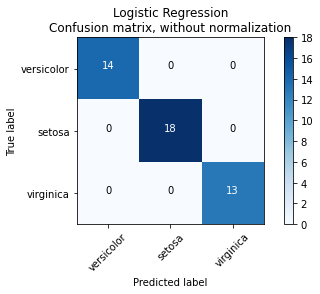

In [ ]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
get_descriptive_data(y_pred, y_test)

y_pred = pd.Series(y_pred).replace([0,1], ['N','Y'])
y_test = pd.Series(y_test).replace([0,1], ['N','Y'])
class_names = list(y_pred.value_counts().index)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression\nConfusion matrix, without normalization')

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy: 97.780000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 121.430000%
Proportion True Positive: 121.430000%
Proportion True Negative: 82.350000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


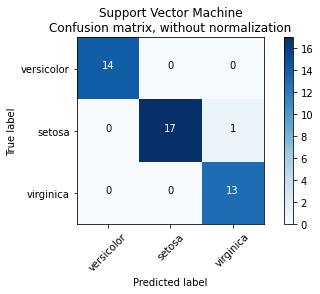

In [ ]:
# Support Vector Machine
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
svm = SVC(random_state=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
print(cnf_matrix)
get_descriptive_data(y_pred_svm, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Support Vector Machine\nConfusion matrix, without normalization')

Accuracy: 100.000000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 128.570000%
Proportion True Positive: 128.570000%
Proportion True Negative: 77.780000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


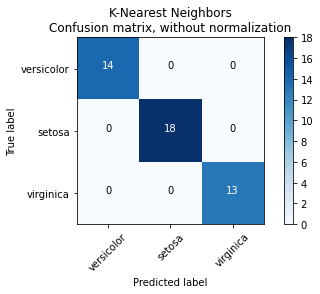

In [ ]:
# K-Nearest Neighbors
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
get_descriptive_data(y_pred, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='K-Nearest Neighbors\nConfusion matrix, without normalization')

Accuracy: 97.780000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 121.430000%
Proportion True Positive: 121.430000%
Proportion True Negative: 82.350000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


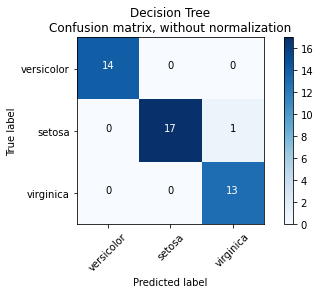

In [ ]:
# Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
get_descriptive_data(y_pred_dtc, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred_dtc)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision Tree\nConfusion matrix, without normalization')

Accuracy: 100.000000%
Overall Error Rate: 0.000000%
False Positive Rate: 0.000000%
False Negative Rate: 0.000000%
Specificity: 77.780000%
Sensitivity: 128.570000%
Proportion True Positive: 128.570000%
Proportion True Negative: 77.780000%
recall: 100.000000%
precision: 100.000000%
FDR: 0.000000%
NPV: 100.000000%
FOR: 0.000000%
F1SCORE: 0.000000%


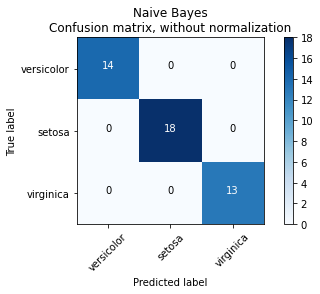

In [ ]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_dtc = gnb.predict(X_test)
get_descriptive_data(y_pred_dtc, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred_dtc)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Naive Bayes\nConfusion matrix, without normalization')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install matplotlib-venn



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install chefboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
#!pip install chefboost
from chefboost.training import Training

In [ ]:
config = {'algorithm': 'C4.5'}

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/serengil/chefboost/master/tests/dataset/golf.txt')

In [ ]:
data.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
config = {'algorithm': 'C4.5'}
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [ ]:
model = chef.fit(data, config = config, target_label = 'Decision')


[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.8800489902496338  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [ ]:
iris.head()

,SN,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


replacing the 0 and 1's of species column of iris dataset with yes/no

In [ ]:
iris.species.replace((1, 0, 2),('yes', 'no','maybe'), inplace=True)  

In [ ]:
iris.head()

,SN,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,no
1,2,4.9,3.0,1.4,0.2,no
2,3,4.7,3.2,1.3,0.2,no
3,4,4.6,3.1,1.5,0.2,no
4,5,5.0,3.6,1.4,0.2,no


splitting the dataset in 70: 30 ratio

In [ ]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(iris, test_size=0.3, random_state=25)


In [ ]:
training_data.head()

,SN,sepal_length,sepal_width,petal_length,petal_width,species
10,11,5.4,3.7,1.5,0.2,no
33,34,5.5,4.2,1.4,0.2,no
78,79,6.0,2.9,4.5,1.5,yes
27,28,5.2,3.5,1.5,0.2,no
121,122,5.6,2.8,4.9,2.0,maybe


In [ ]:
testing_data.head()

,SN,sepal_length,sepal_width,petal_length,petal_width,species
28,29,5.2,3.4,1.4,0.2,no
72,73,6.3,2.5,4.9,1.5,yes
70,71,5.9,3.2,4.8,1.8,yes
85,86,6.0,3.4,4.5,1.6,yes
128,129,6.4,2.8,5.6,2.1,maybe


In [ ]:
config = {'algorithm': 'C4.5'}
# model = chef.fit(iris,config = config, target_label = 'species')
model = chef.fit(training_data,config = config, target_label = 'species')







[INFO]:  1 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  1.6541354656219482  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  105  instances
Labels:  ['no' 'yes' 'maybe']
Confusion matrix:  [[33, 0, 0], [0, 34, 0], [0, 0, 38]]
Decision  no  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  yes  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  maybe  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [ ]:
chef.predict(model,testing_data.iloc[13])


'maybe'

In [ ]:
config = {'algorithm': 'CART'}
model = chef.fit(training_data,config = config, target_label = 'species')

[INFO]:  1 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  0.9313547611236572  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  105  instances
Labels:  ['no' 'yes' 'maybe']
Confusion matrix:  [[33, 0, 0], [0, 34, 0], [0, 0, 38]]
Decision  no  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  yes  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  maybe  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [ ]:
config = {'algorithm': 'ID3'}
model = chef.fit(training_data,config = config, target_label = 'species')

[INFO]:  1 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  1.3397579193115234  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  105  instances
Labels:  ['no' 'yes' 'maybe']
Confusion matrix:  [[33, 0, 0], [0, 34, 0], [0, 0, 38]]
Decision  no  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  yes  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  maybe  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [ ]:
config = {'algorithm': 'CHAID'}
model = chef.fit(training_data,config = config, target_label = 'species')

[INFO]:  1 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  1.5618891716003418  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  105  instances
Labels:  ['no' 'yes' 'maybe']
Confusion matrix:  [[33, 0, 0], [0, 34, 0], [0, 0, 38]]
Decision  no  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  yes  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  maybe  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
